# Forecasting Car Sales using ARIMA Model
* preprocessing
* Manual
* AutoArima
* training and testing
* forecast

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from pmdarima import auto_arima

# Preparing the dataset

In [ ]:
# file_path = '/content/drive/MyDrive/Internships/Cognibotz/SampleSize.xlsx'
# sheet1 = pd.read_excel(file_path, sheet_name='Sales Data - From View')
# columns_sheet1 = ['DATEINSTOC', 'BRANCHNO', 'SALEPRICE', 'SALETYPEID', 'Make', 'Model', 'BODYCOLOUR', 'Mileage']
# df1 = sheet1[columns_sheet1]
# output_path = '/content/drive/MyDrive/Internships/Cognibotz/SalesData.csv'
# df1.to_csv(output_path, index=False)
# print(df1.head())
# print(df1.shape)


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Internships /Cognibotz/SalesData.csv')
print(df1.head())
print(df1.shape)

            DATEINSTOC BRANCHNO SALEPRICE SALETYPEID  Make  \
0  2021-04-01 00:00:00        1     33165        128  Ford   
1  2021-04-06 00:00:00        1   13332.5        134  Ford   
2  2021-04-07 00:00:00        1     10750        135  Ford   
3  2021-04-07 00:00:00        1     12299        135  Ford   
4  2021-04-07 00:00:00        1      8500        135  Ford   

                Model   BODYCOLOUR Mileage  
0  Transit Custom 2.0  Chrome Blue     NaN  
1               Focus         Grey   12959  
2            Ecosport         Grey   18138  
3            Ecosport        Black   21837  
4            Ecosport         Blue   23236  
(33844, 8)


 ## Data cleaning ,Removing outliers

In [ ]:
error_count = 0
def safe_to_datetime(val):
    global error_count
    try:
        return pd.to_datetime(val)
    except ValueError:
        error_count += 1
        return np.nan

df1['DATEINSTOC'] = df1['DATEINSTOC'].apply(safe_to_datetime)
df1 = df1.dropna(subset=['DATEINSTOC'])
print(f"Number of invalid date entries: {error_count}")
df1 = df1[df1['DATEINSTOC'] > '2021-04-30']
print(df1.head())
print(df1.shape)


Number of invalid date entries: 1
    DATEINSTOC BRANCHNO   SALEPRICE SALETYPEID  Make           Model  \
112 2021-05-04        4  14149.1667        134  FORD            KUGA   
113 2021-05-04        4        7979        137  FORD        ECOSPORT   
114 2021-05-04        1       34999        135  Ford         Mustang   
115 2021-05-04        1    27143.66        135  Ford           Focus   
116 2021-07-06        4       17979        137  FORD  MONDEO VIGNALE   

                   BODYCOLOUR Mileage  
112                    silver   13599  
113  Metallic - Panther black   39335  
114                      Grey   19496  
115                      Blue   34859  
116            White Platinum   40159  
(33711, 8)


In [ ]:
df1 = df1.dropna(subset=['SALEPRICE'])
df1 = df1.dropna(subset=['BRANCHNO'])
df1 = df1.dropna(subset=['Make'])
df1 = df1.dropna(subset=['Model'])
df1 = df1.dropna(subset=['BODYCOLOUR'])
df1 = df1.dropna(subset=['SALETYPEID'])
print(df1.head())
print(df1.shape)

    DATEINSTOC BRANCHNO   SALEPRICE SALETYPEID  Make           Model  \
112 2021-05-04        4  14149.1667        134  FORD            KUGA   
113 2021-05-04        4        7979        137  FORD        ECOSPORT   
114 2021-05-04        1       34999        135  Ford         Mustang   
115 2021-05-04        1    27143.66        135  Ford           Focus   
116 2021-07-06        4       17979        137  FORD  MONDEO VIGNALE   

                   BODYCOLOUR Mileage  
112                    silver   13599  
113  Metallic - Panther black   39335  
114                      Grey   19496  
115                      Blue   34859  
116            White Platinum   40159  
(33514, 8)


In [ ]:
# Check the column names in the DataFrame
print(df1.columns)

Index(['DATEINSTOC', 'BRANCHNO', 'SALEPRICE', 'SALETYPEID', 'Make', 'Model',
       'BODYCOLOUR', 'Mileage'],
      dtype='object')


In [ ]:
# Handle missing values
# df1['Mileage'].fillna(df1['Mileage'].mean(), inplace=True)
# Remove rows with missing values in the 'Mileage' column
# df1 = df1.dropna(subset=['Mileage'])

In [ ]:
df1['Mileage'] = pd.to_numeric(df1['Mileage'], errors='coerce')
grouped_means = df1.groupby(['Make', 'Model'])['Mileage'].mean()

df1['Mileage'] = df1.apply(lambda row: grouped_means.get((row['Make'], row['Model']), np.nan)
                          if pd.isna(row['Mileage']) else row['Mileage'], axis=1)
df1 = df1.dropna(subset=['Mileage'])
output_path = '/content/drive/MyDrive/Internships /Cognibotz/SalesDatacleaned.csv'
df1.to_csv(output_path, index=False)
print(df1.head())
print(df1.shape)

    DATEINSTOC BRANCHNO   SALEPRICE SALETYPEID  Make           Model  \
112 2021-05-04        4  14149.1667        134  FORD            KUGA   
113 2021-05-04        4        7979        137  FORD        ECOSPORT   
114 2021-05-04        1       34999        135  Ford         Mustang   
115 2021-05-04        1    27143.66        135  Ford           Focus   
116 2021-07-06        4       17979        137  FORD  MONDEO VIGNALE   

                   BODYCOLOUR  Mileage  
112                    silver  13599.0  
113  Metallic - Panther black  39335.0  
114                      Grey  19496.0  
115                      Blue  34859.0  
116            White Platinum  40159.0  
(32505, 8)


In [ ]:
df1cs = pd.read_csv('/content/drive/MyDrive/Internships /Cognibotz/SalesDatacleaned.csv')
df1cs = df1cs.dropna()
print(df1cs.head())
print(df1cs.shape)

   DATEINSTOC  BRANCHNO   SALEPRICE  SALETYPEID  Make           Model  \
0  2021-05-04         4  14149.1667         134  FORD            KUGA   
1  2021-05-04         4   7979.0000         137  FORD        ECOSPORT   
2  2021-05-04         1  34999.0000         135  Ford         Mustang   
3  2021-05-04         1  27143.6600         135  Ford           Focus   
4  2021-07-06         4  17979.0000         137  FORD  MONDEO VIGNALE   

                 BODYCOLOUR  Mileage  
0                    silver  13599.0  
1  Metallic - Panther black  39335.0  
2                      Grey  19496.0  
3                      Blue  34859.0  
4            White Platinum  40159.0  
(32505, 8)


In [ ]:
df1cs['DATEINSTOC'] = pd.to_datetime(df1cs['DATEINSTOC'])
df1cs['Month'] = df1cs['DATEINSTOC'].dt.to_period('M')
monthly_sales = df1cs.groupby('Month').size().reset_index(name='Monthly_Sales')
df1cs = df1cs.merge(monthly_sales, on='Month', how='left')

In [ ]:
df1cs = df1cs.drop('DATEINSTOC', axis = 1)
output_path = '/content/drive/MyDrive/Internships /Cognibotz/SalesDataSA.csv'
df1cs.to_csv(output_path, index=False)
print(df1cs.head())
print(df1cs.shape)

   BRANCHNO   SALEPRICE  SALETYPEID  Make           Model  \
0         4  14149.1667         134  FORD            KUGA   
1         4   7979.0000         137  FORD        ECOSPORT   
2         1  34999.0000         135  Ford         Mustang   
3         1  27143.6600         135  Ford           Focus   
4         4  17979.0000         137  FORD  MONDEO VIGNALE   

                 BODYCOLOUR  Mileage    Month  Monthly_Sales  
0                    silver  13599.0  2021-05           1083  
1  Metallic - Panther black  39335.0  2021-05           1083  
2                      Grey  19496.0  2021-05           1083  
3                      Blue  34859.0  2021-05           1083  
4            White Platinum  40159.0  2021-07           1259  
(32505, 9)


# Load the data

In [ ]:
dfs = pd.read_csv('/content/drive/MyDrive/Internships /Cognibotz/SalesDataSA.csv', index_col = 'Month', parse_dates = True)
dfs = dfs.dropna()
print(dfs.head())
print(dfs.shape)

            BRANCHNO   SALEPRICE  SALETYPEID  Make           Model  \
Month                                                                
2021-05-01         4  14149.1667         134  FORD            KUGA   
2021-05-01         4   7979.0000         137  FORD        ECOSPORT   
2021-05-01         1  34999.0000         135  Ford         Mustang   
2021-05-01         1  27143.6600         135  Ford           Focus   
2021-07-01         4  17979.0000         137  FORD  MONDEO VIGNALE   

                          BODYCOLOUR  Mileage  Monthly_Sales  
Month                                                         
2021-05-01                    silver  13599.0           1083  
2021-05-01  Metallic - Panther black  39335.0           1083  
2021-05-01                      Grey  19496.0           1083  
2021-05-01                      Blue  34859.0           1083  
2021-07-01            White Platinum  40159.0           1259  
(32505, 8)


In [ ]:
monthly_sales = dfs.groupby(dfs.index)['Monthly_Sales'].first().reset_index()
print(monthly_sales.head())
print(monthly_sales.shape)

       Month  Monthly_Sales
0 2021-05-01           1083
1 2021-06-01           1046
2 2021-07-01           1259
3 2021-08-01            983
4 2021-09-01           1032
(34, 2)


## plots

<ipython-input-220-755e055c6e79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Monthly_Sales', data= monthly_sales, palette='viridis')


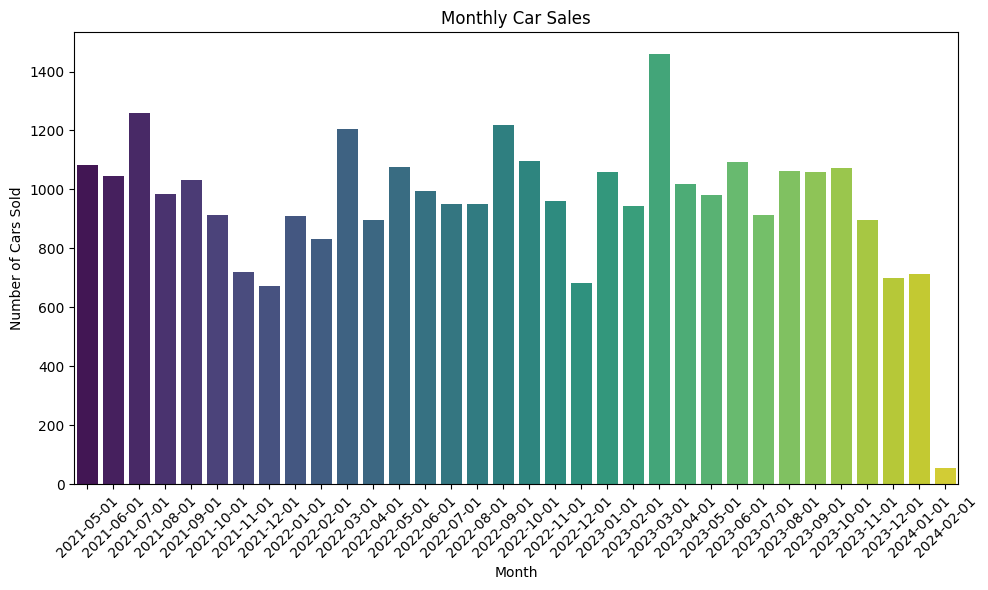

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Monthly_Sales', data= monthly_sales, palette='viridis')
plt.title('Monthly Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

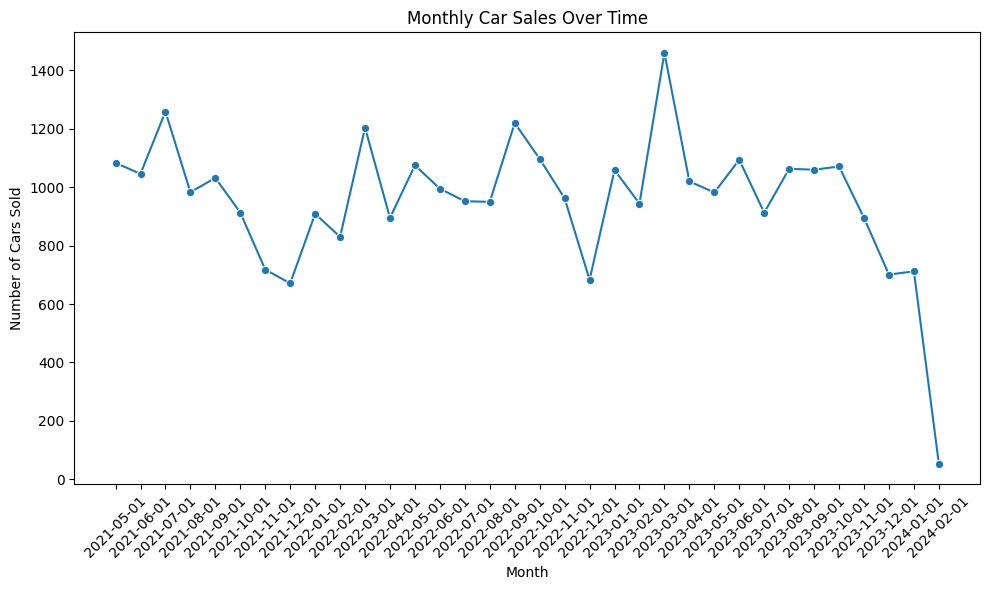

In [ ]:
# Convert 'Month' column to string type explicitly
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Monthly_Sales', data=monthly_sales, marker='o')
plt.title('Monthly Car Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 1: Check for stationarity of time series
### Method 1: time series plot
### Method 2: ACF plot and PACF plot 1

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# print(dfs.shape)
train_size = int(len(monthly_sales) * 0.8)
train, test = monthly_sales.iloc[0:train_size], monthly_sales.iloc[train_size:]
print(train.shape, test.shape)


(27, 2) (7, 2)


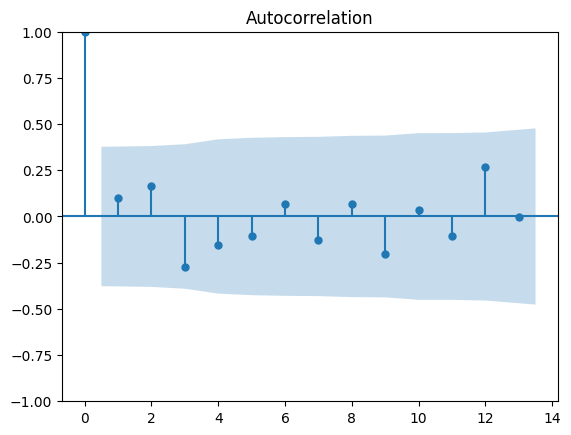

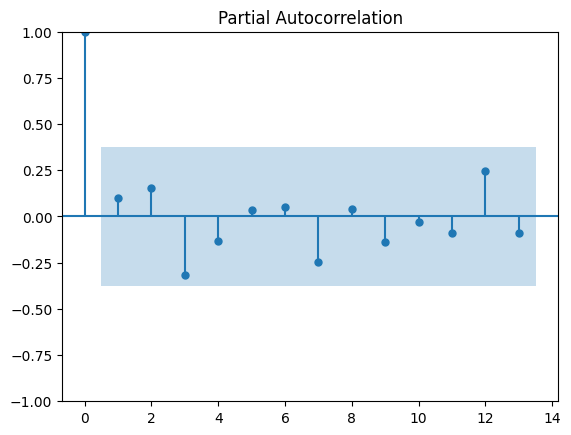

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_original = plot_acf(train['Monthly_Sales'])
pacf_original = plot_pacf(train['Monthly_Sales'])

## Method3 : ADF Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num of Observations Used For ADF Regression and Critical Values Calculation", dftest [3])
  print("5. Critical Values :")
  for key, val in dftest [4].items():
    print("\t",key, ":", val)
  # Check stationarity
  if dftest[1] <= 0.05:
    print("Series is stationary (p-value <= 0.05).")
  else:
    print("Series is not stationary (p-value > 0.05).")


In [ ]:
ad_test(train['Monthly_Sales'])

1. ADF -3.3924835728164524
2. P-Value :  0.011217790474825625
3. Num Of Lags :  2
4. Num of Observations Used For ADF Regression and Critical Values Calculation 24
5. Critical Values :
	 1% : -3.7377092158564813
	 5% : -2.9922162731481485
	 10% : -2.635746736111111
Series is stationary (p-value <= 0.05).


## Transform to stationary: differencing

<Axes: >

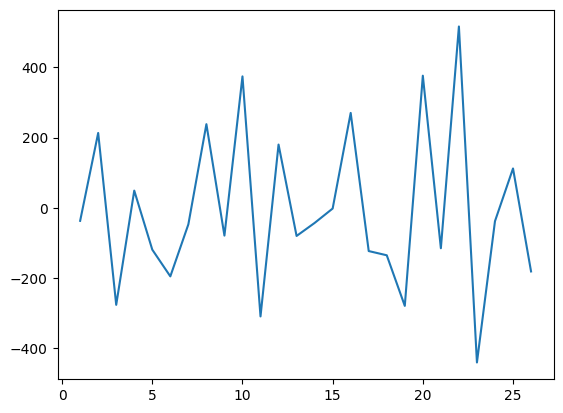

In [ ]:
df_train_diff = train['Monthly_Sales'].diff().dropna()
df_train_diff.plot()

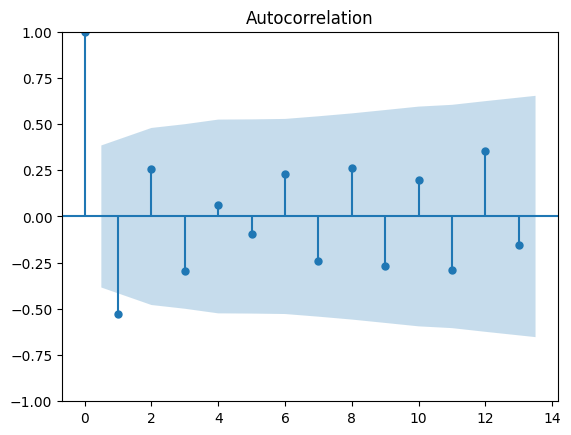

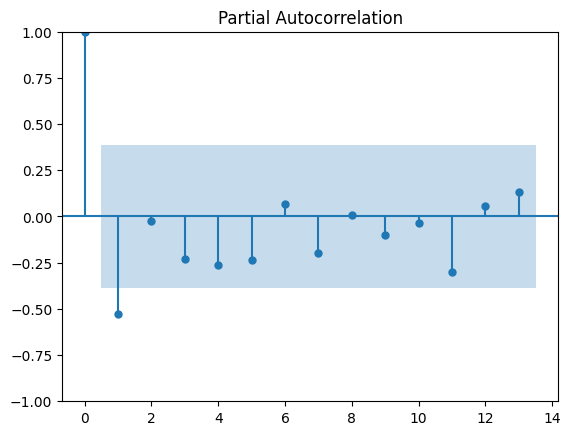

In [ ]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [ ]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test [1]}')

p-value: 0.0023715224790295903


# Step2: Determine ARIMA model paramters p, q

# Step3: Fit the Arima Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_manual = ARIMA(train['Monthly_Sales'], order=(2,1,2))
model_fit_manual =  model_manual.fit()
print(model_fit_manual.summary())

                               SARIMAX Results                                
Dep. Variable:          Monthly_Sales   No. Observations:                   27
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -170.303
Date:                Mon, 09 Sep 2024   AIC                            350.605
Time:                        12:24:22   BIC                            356.896
Sample:                             0   HQIC                           352.417
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6905      0.310     -2.230      0.026      -1.297      -0.084
ar.L2          0.3094      0.275      1.126      0.260      -0.229       0.848
ma.L1         -0.0067      5.792     -0.001      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


# Step 4 : Make Time Series Prediction

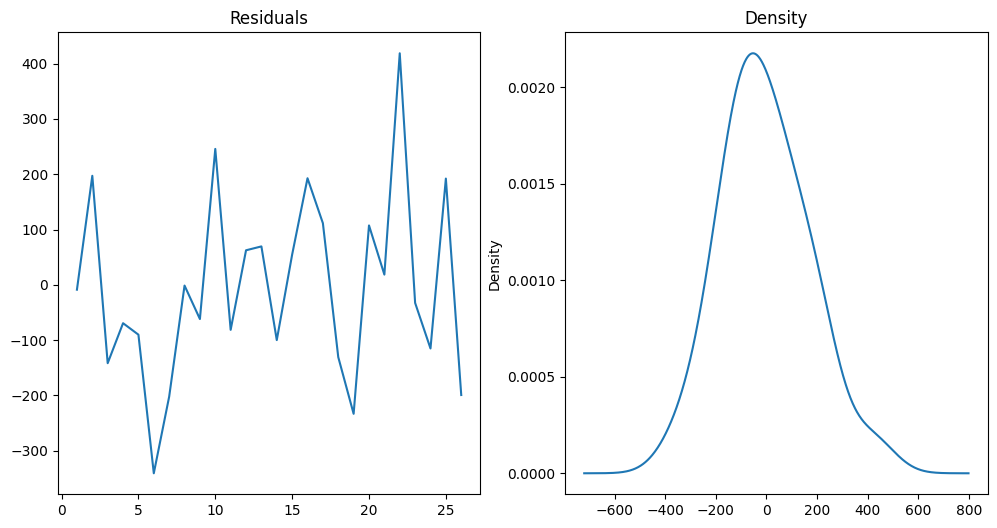

In [ ]:
import matplotlib.pyplot as plt
residuals_manual = model_fit_manual.resid[1:]
fig, ax = plt.subplots(1,2, figsize=(12, 6))
residuals_manual.plot(title= 'Residuals', ax=ax[0])
residuals_manual.plot(title= 'Density', kind='kde', ax=ax[1])
plt.show()

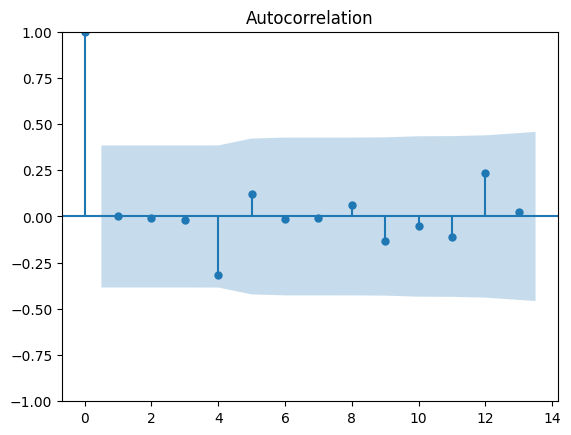

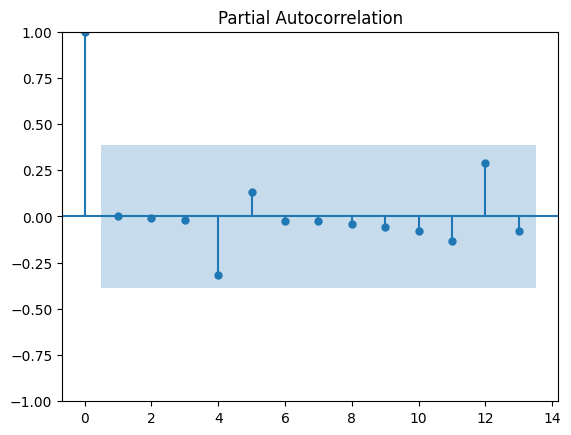

In [ ]:
acf_res = plot_acf(residuals_manual)
pacf_res = plot_pacf(residuals_manual)

In [ ]:
# Step 8: Perform Ljung-Box test to check if residuals are white noise
lb_test = acorr_ljungbox(residuals_manual, lags=[10], return_df=True)
print(lb_test)


     lb_stat  lb_pvalue
10  4.884001   0.898791


<Axes: >

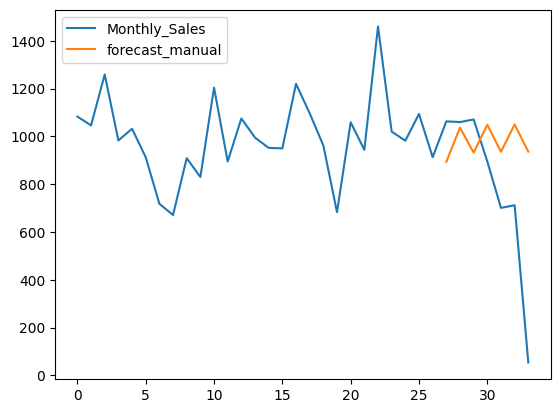

In [ ]:
forecast_manual = model_fit_manual.forecast(steps =len(test['Monthly_Sales']))
monthly_sales['forecast_manual'] = [None] *len (train['Monthly_Sales']) + list (forecast_manual)
monthly_sales.plot()

## Optional: Auto-Fit the Arima Model

In [ ]:
import pmdarima as pm
auto_arima_model = pm.auto_arima (train['Monthly_Sales'], stepwise=False, seasonal=False)
print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:               SARIMAX(1, 0, 4)   Log Likelihood                -178.250
Date:                Mon, 09 Sep 2024   AIC                            368.500
Time:                        12:24:26   BIC                            376.276
Sample:                             0   HQIC                           370.812
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   6620.979      0.000       1.000       1.000
ma.L1         -0.8986      0.400     -2.244      0.025      -1.684      -0.114
ma.L2          0.4438      0.209      2.128      0.0

#Step5: Evaluate Model predictions

<Axes: >

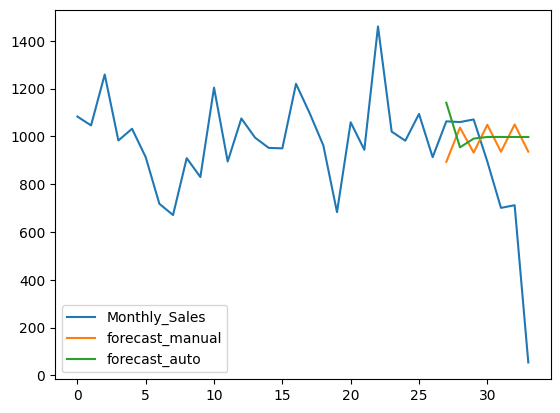

In [ ]:
forecast_auto = auto_arima_model.predict(n_periods=len(test['Monthly_Sales']))
monthly_sales['forecast_auto'] = [None] *len(train['Monthly_Sales']) + list (forecast_auto)
monthly_sales.plot()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
mae = mean_absolute_error(test['Monthly_Sales'], forecast_manual)
mape = mean_absolute_percentage_error(test['Monthly_Sales'], forecast_manual)
rmse = np.sqrt(mean_squared_error(test['Monthly_Sales'], forecast_manual))
print (f'mae manual: {mae}')
print(f'mape manual: {mape}')
print(f'rmse - manual: {rmse}')

mae manual: 277.10909917832623
mape manual: 2.5183405814567252
rmse - manual: 381.64767486791965


In [ ]:
mae = mean_absolute_error(test['Monthly_Sales'], forecast_auto)
mape = mean_absolute_percentage_error(test['Monthly_Sales'], forecast_auto)
rmse = np.sqrt(mean_squared_error(test['Monthly_Sales'], forecast_auto))
print (f'mae auto: {mae}')
print (f'mape auto: {mape}')
print (f'rmse auto: {rmse}')

mae auto: 270.321064139189
mape auto: 2.6659485248162658
rmse auto: 395.37309740219433


In [ ]:
print(f'Manual ARIMA AIC: {model_fit_manual.aic}')
print(f'Auto ARIMA AIC: {auto_arima_model.aic()}')

Manual ARIMA AIC: 350.60513878147174
Auto ARIMA AIC: 368.50049276725355


#Step6: Forecast for next 3 months

In [ ]:
print(monthly_sales.tail(7))

         Month  Monthly_Sales  forecast_manual  forecast_auto
27  2023-08-01           1063       893.782968    1140.687202
28  2023-09-01           1060      1036.872389     954.275023
29  2023-10-01           1071       932.126368     990.740570
30  2023-11-01            895      1048.721559     997.647101
31  2023-12-01            701       935.807707     997.645007
32  2024-01-01            712      1049.845649     997.642913
33  2024-02-01             54       936.170504     997.640818


In [ ]:
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])
monthly_sales = monthly_sales.set_index('Month')
print(monthly_sales.head())

            Monthly_Sales  forecast_manual  forecast_auto
Month                                                    
2021-05-01           1083              NaN            NaN
2021-06-01           1046              NaN            NaN
2021-07-01           1259              NaN            NaN
2021-08-01            983              NaN            NaN
2021-09-01           1032              NaN            NaN


In [ ]:
print(type(monthly_sales.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
forecast_manual_test = model_fit_manual.forecast(steps=len(test['Monthly_Sales']))
forecast_manual_next_3 = model_fit_manual.forecast(steps=3)
forecast_auto_test = auto_arima_model.predict(n_periods=len(test['Monthly_Sales']))
forecast_auto_next_3 = auto_arima_model.predict(n_periods=3)
extended_dates = pd.date_range(start=monthly_sales.index[-1], periods=4, freq='M')[1:]
forecast_df = pd.DataFrame(index=extended_dates)
monthly_sales = pd.concat([monthly_sales, forecast_df])
manual_forecast_values = list(forecast_manual_test) + list(forecast_manual_next_3)
auto_forecast_values = list(forecast_auto_test) + list(forecast_auto_next_3)
monthly_sales['forecast_manual'] = [None] * len(train['Monthly_Sales']) + manual_forecast_values
monthly_sales['forecast_auto'] = [None] * len(train['Monthly_Sales']) + auto_forecast_values


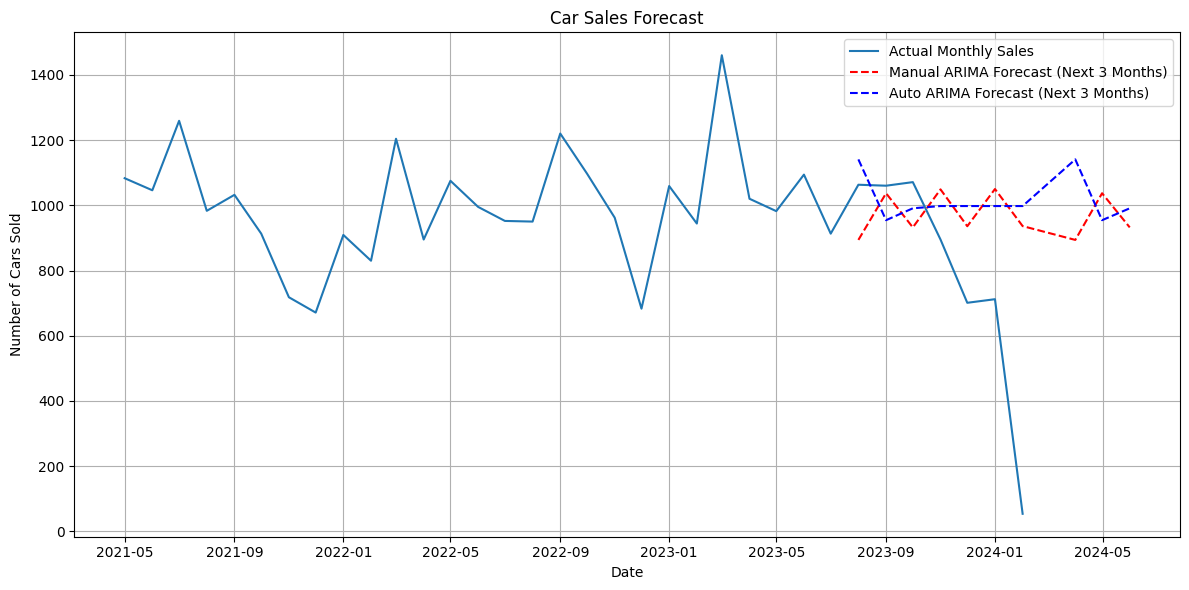

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Monthly_Sales'], label='Actual Monthly Sales')
plt.plot(monthly_sales.index, monthly_sales['forecast_manual'], label='Manual ARIMA Forecast (Next 3 Months)', linestyle='--', color='red')
plt.plot(monthly_sales.index, monthly_sales['forecast_auto'], label='Auto ARIMA Forecast (Next 3 Months)', linestyle='--', color='blue')
plt.title('Car Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Cars Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(monthly_sales.tail(10))

            Monthly_Sales  forecast_manual  forecast_auto
2023-08-01         1063.0       893.782968    1140.687202
2023-09-01         1060.0      1036.872389     954.275023
2023-10-01         1071.0       932.126368     990.740570
2023-11-01          895.0      1048.721559     997.647101
2023-12-01          701.0       935.807707     997.645007
2024-01-01          712.0      1049.845649     997.642913
2024-02-01           54.0       936.170504     997.640818
2024-03-31            NaN       893.782968    1140.687202
2024-04-30            NaN      1036.872389     954.275023
2024-05-31            NaN       932.126368     990.740570
